Question 1

Question 1


Dataset Description:
             MedInc   MedHouseVal
count  20640.000000  20640.000000
mean       3.870671      2.068558
std        1.899822      1.153956
min        0.499900      0.149990
25%        2.563400      1.196000
50%        3.534800      1.797000
75%        4.743250      2.647250
max       15.000100      5.000010


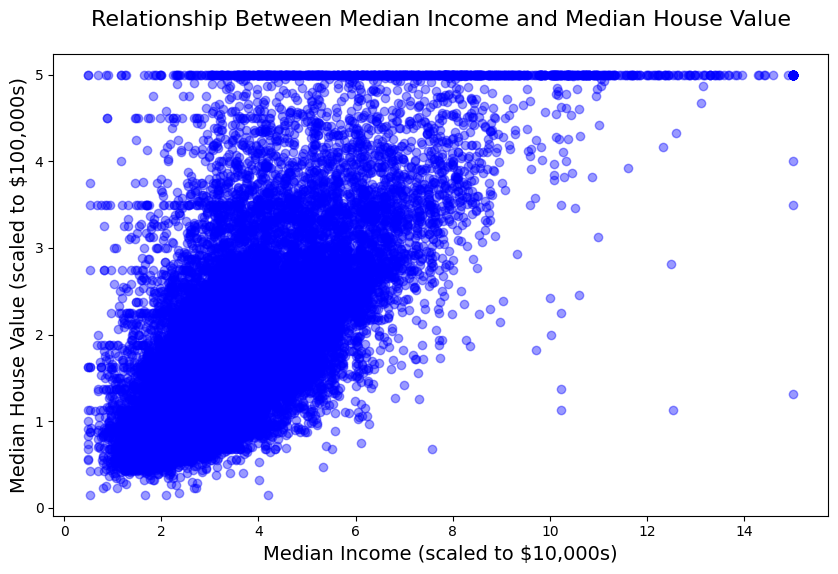


Batch Gradient Descent Model Coefficients:
Slope (Coefficient): 0.7985
Intercept: 2.0719

Stochastic Gradient Descent Model Coefficients:
Slope (Coefficient): 0.8028
Intercept: 2.0817

Predicted house value for median income of $80,000 (Batch GD): $379930.52
Predicted house value for median income of $80,000 (SGD): $381817.88


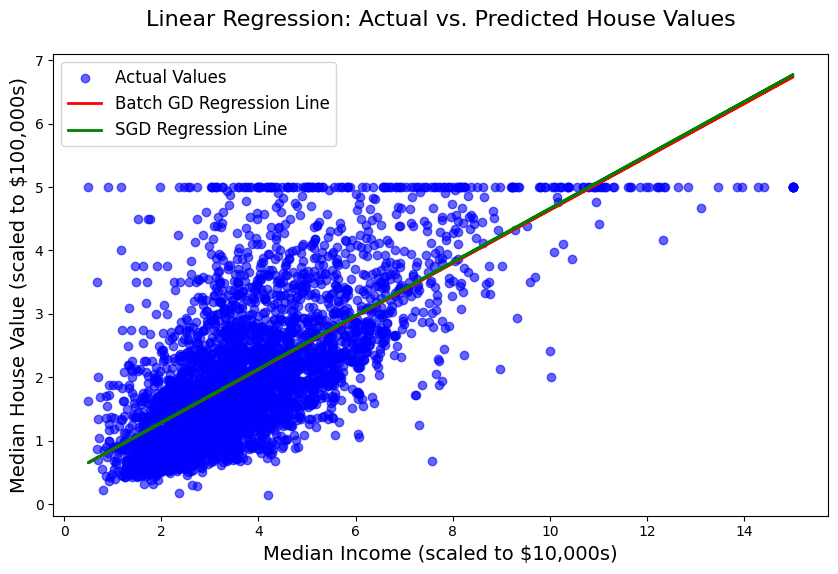

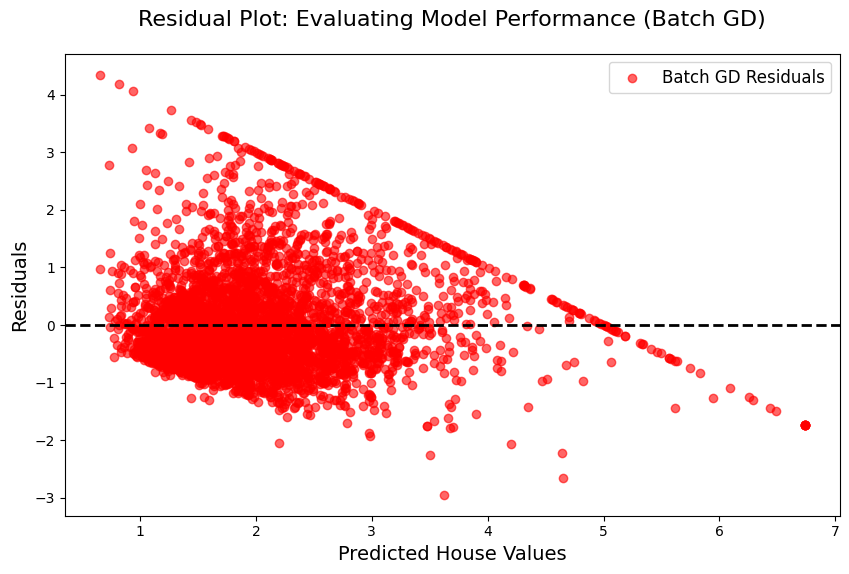

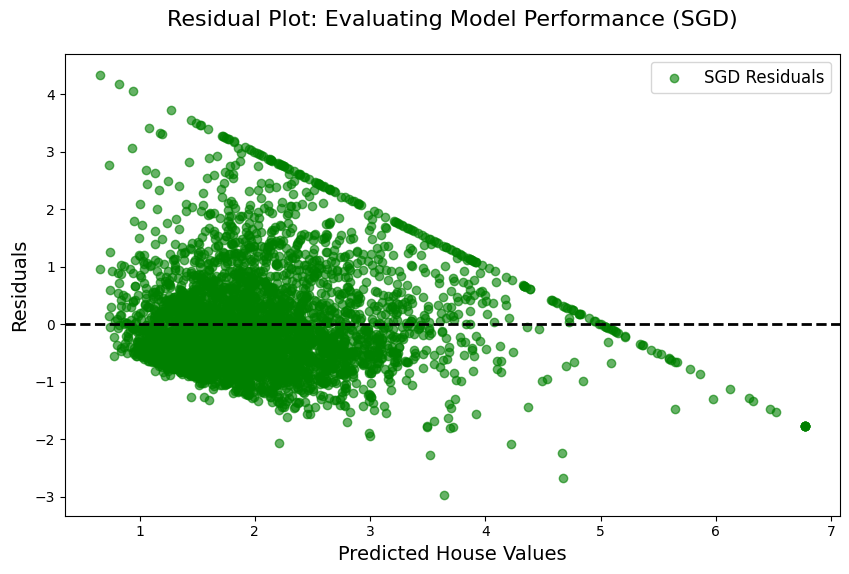


Mean Squared Error (Batch GD): 0.7091
Mean Squared Error (SGD): 0.7093


In [7]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Loading and Exploring the Data
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target


# Displaing dataset to understand datset distribution better
print("\nDataset Description:")
print(data[['MedInc', 'MedHouseVal']].describe()) # .describe() give summary of data

# Scatter Plot of MedInc vs. MedHouseVal
plt.figure(figsize=(10, 6))
plt.scatter(data['MedInc'], data['MedHouseVal'], alpha=0.4, color='blue')
plt.xlabel('Median Income (scaled to $10,000s)', fontsize=14)
plt.ylabel('Median House Value (scaled to $100,000s)', fontsize=14)
plt.title('Relationship Between Median Income and Median House Value', fontsize=16, pad=20)
plt.show()

# Preprocess the Data
# Splitting the data into features (X) and target (y)
X = data[['MedInc']]  # Using only Median Income as the feature
y = data['MedHouseVal']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature to ensure test data is scaled consistently
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a Linear Regression Model
# Train a linear regression model using Batch Gradient Descent (LinearRegression)
batch_gd_model = LinearRegression()
batch_gd_model.fit(X_train_scaled, y_train)

# Training a linear regression model using Stochastic Gradient Descent (SGDRegressor)
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train_scaled, y_train)

# Display model coefficients
print("\nBatch Gradient Descent Model Coefficients:")
print(f"Slope (Coefficient): {batch_gd_model.coef_[0]:.4f}")
print(f"Intercept: {batch_gd_model.intercept_:.4f}")
print("\nStochastic Gradient Descent Model Coefficients:")
print(f"Slope (Coefficient): {sgd_model.coef_[0]:.4f}")
print(f"Intercept: {sgd_model.intercept_[0]:.4f}")

# Predicting house values for test set using both of the models
y_pred_batch_gd = batch_gd_model.predict(X_test_scaled)
y_pred_sgd = sgd_model.predict(X_test_scaled)

# Predicting the house value for a district with a median income of $80,000 : ensure MedInc = 8.0
sample_income = pd.DataFrame([[8.0]], columns=['MedInc'])  # Ensure feature name matches training data
sample_income_scaled = scaler.transform(sample_income)

predicted_value_batch_gd = batch_gd_model.predict(sample_income_scaled)
predicted_value_sgd = sgd_model.predict(sample_income_scaled)

print(f"\nPredicted house value for median income of $80,000 (Batch GD): ${predicted_value_batch_gd[0] * 100000:.2f}")
print(f"Predicted house value for median income of $80,000 (SGD): ${predicted_value_sgd[0] * 100000:.2f}")

# Scatter Plots and Regression lines
# Plot the regression lines overlaid on the test data scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test['MedInc'], y_test, color='blue', alpha=0.6, label='Actual Values')
plt.plot(X_test['MedInc'], y_pred_batch_gd, color='red', lw=2, label='Batch GD Regression Line')
plt.plot(X_test['MedInc'], y_pred_sgd, color='green', lw=2, label='SGD Regression Line')
plt.xlabel('Median Income (scaled to $10,000s)', fontsize=14)
plt.ylabel('Median House Value (scaled to $100,000s)', fontsize=14)
plt.title('Linear Regression: Actual vs. Predicted House Values', fontsize=16, pad=20)
plt.legend(fontsize=12)
plt.show()

# 7. Residual Plots for Model Evaluation
# Residual plot for Batch Gradient Descent
residuals_batch_gd = y_test - y_pred_batch_gd
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_batch_gd, residuals_batch_gd, color='red', alpha=0.6, label='Batch GD Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted House Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot: Evaluating Model Performance (Batch GD)', fontsize=16, pad=20)
plt.legend(fontsize=12)
plt.show()

# Residual plot for Stochastic Gradient Descent
residuals_sgd = y_test - y_pred_sgd
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sgd, residuals_sgd, color='green', alpha=0.6, label='SGD Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted House Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot: Evaluating Model Performance (SGD)', fontsize=16, pad=20)
plt.legend(fontsize=12)
plt.show()

# Evaluating Model Performance
# Calculate Mean Squared Error (MSE) for both models
mse_batch_gd = mean_squared_error(y_test, y_pred_batch_gd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

print(f"\nMean Squared Error (Batch GD): {mse_batch_gd:.4f}")
print(f"Mean Squared Error (SGD): {mse_sgd:.4f}")